# CitiBike NYC 2022 Analysis

This notebook explores the 2022 CitiBike trip data for New York City.

We'll look at the most popular stations and visualize the top 20 routes using static charts and maps.


In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
print('Libraries imported successfully!')

Libraries imported successfully!


## Load and Preview Data

Let's load the CitiBike data and check the first few rows to make sure everything is working.

In [8]:
# Import pandas library first
import pandas as pd

# Now use pandas functions
df = pd.read_csv('citibike_2022_cleaned.csv')
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
print('Data shape:', df.shape)
df.head()

/tmp/ipykernel_2379/1513984299.py:5: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('citibike_2022_cleaned.csv')


Data shape: (5116900, 14)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
0,3A2034DA67C8874B,electric_bike,2022-09-14 20:37:39.155,2022-09-14 21:05:39.760,N 12 St & Bedford Ave,5450.04,Albany St & Greenwich St,5145.02,40.720796,-73.954882,40.709267,-74.013247,casual,28.010083
1,F1C63DACDCC1C33D,electric_bike,2022-09-17 19:21:39.407,2022-09-17 20:08:32.670,Union Ave & Jackson St,5300.06,Metropolitan Ave & Meeker Ave,5300.05,40.716075,-73.952029,40.714133,-73.952344,casual,46.887717
2,94372C52777F4AC1,electric_bike,2022-09-17 16:49:21.830,2022-09-17 17:01:51.537,S 4 St & Wythe Ave,5204.05,St Marks Pl & 1 Ave,5626.13,40.712874,-73.965935,40.727791,-73.985649,casual,12.495117
3,44818FEC94B62B66,electric_bike,2022-09-08 12:27:40.019,2022-09-08 12:47:15.649,Amsterdam Ave & W 73 St,7260.09,Washington St & Gansevoort St,6039.06,40.779668,-73.980930,40.739323,-74.008119,casual,19.593833
4,F8A63709F214EBAA,classic_bike,2022-09-16 19:00:19.266,2022-09-16 19:07:28.905,University Pl & E 14 St,5905.14,Washington St & Gansevoort St,6039.06,40.734814,-73.992085,40.739323,-74.008119,member,7.160650


## Top 10 Most Popular Start Stations

We'll plot a bar chart of the most popular start stations.

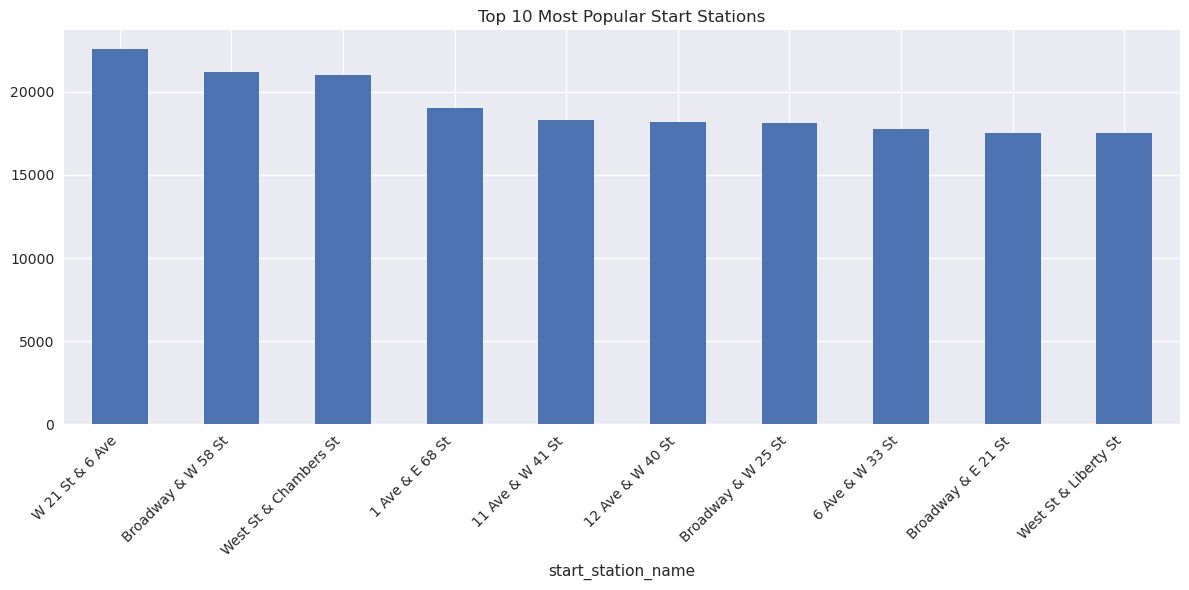

In [10]:
# Import matplotlib.pyplot library first
import matplotlib.pyplot as plt

# Now use plt functions
plt.figure(figsize=(12, 6))
df['start_station_name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Popular Start Stations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Top 20 CitiBike Routes (Static Map)

Now let's visualize the top 20 most common routes as lines on a static map.

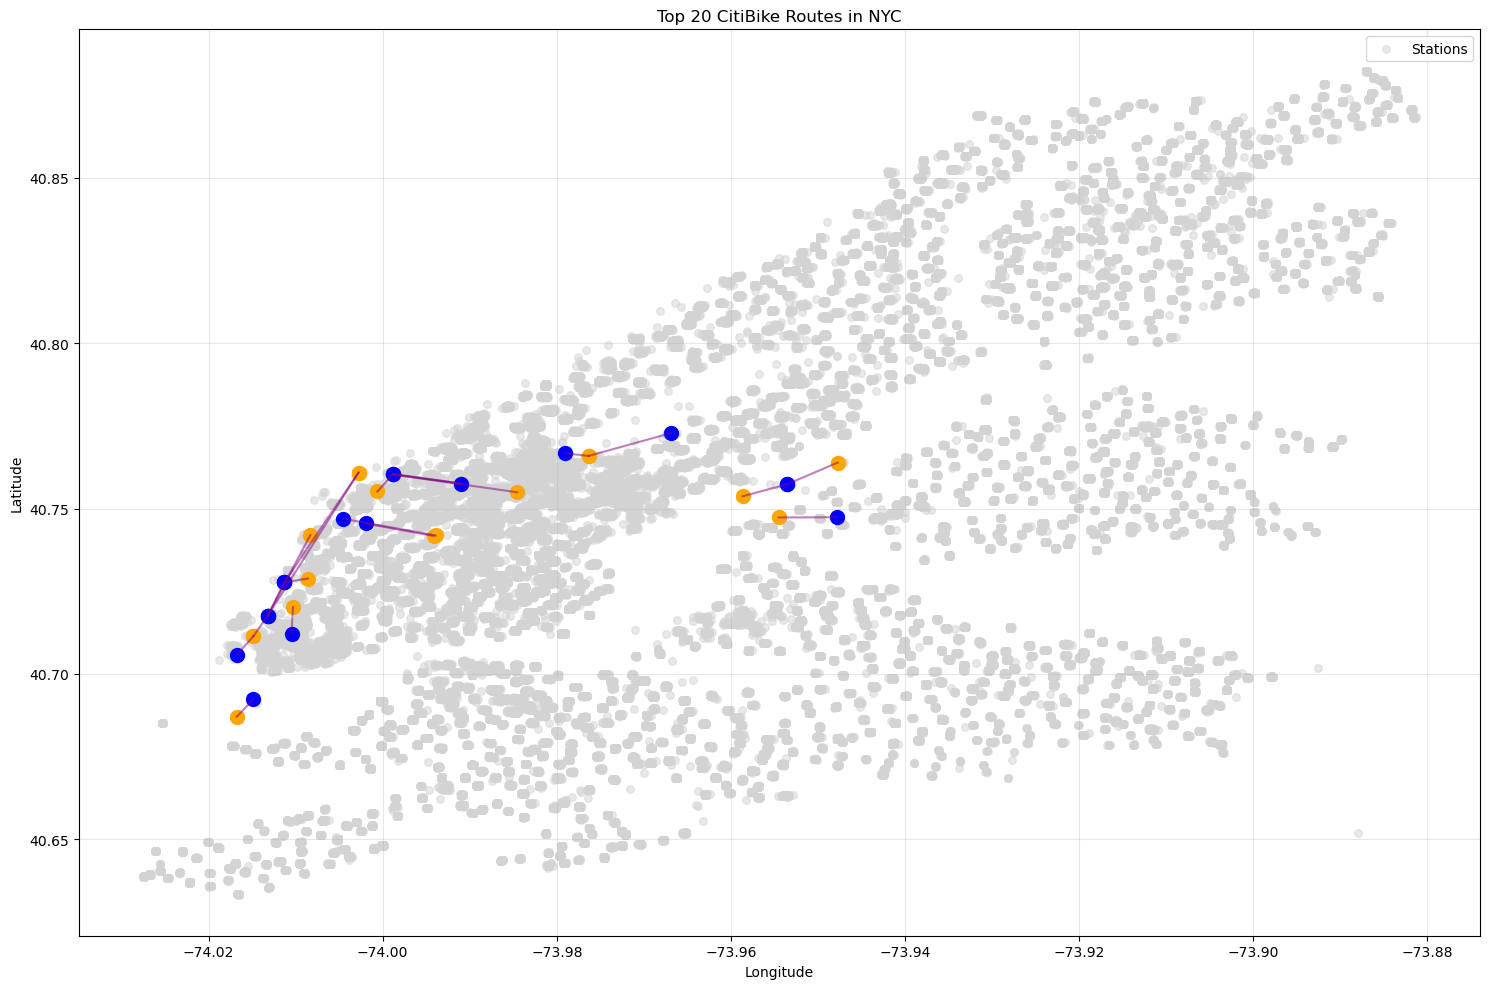

In [6]:
df['trip_count'] = 1
station_pairs = df.groupby(['start_station_name', 'end_station_name']).agg({
    'trip_count': 'sum',
    'start_lat': 'first',
    'start_lng': 'first',
    'end_lat': 'first',
    'end_lng': 'first'
}).reset_index()
station_pairs = station_pairs.sort_values('trip_count', ascending=False)
top_pairs = station_pairs[station_pairs['start_station_name'] != station_pairs['end_station_name']].head(20)
unique_stations = df[['start_lat', 'start_lng']].drop_duplicates()
plt.figure(figsize=(15, 10))
plt.scatter(unique_stations['start_lng'], unique_stations['start_lat'], c='lightgray', alpha=0.5, s=30, label='Stations')
for idx, row in top_pairs.iterrows():
    plt.plot([row['start_lng'], row['end_lng']], [row['start_lat'], row['end_lat']], 'purple', alpha=0.5)
    plt.scatter(row['start_lng'], row['start_lat'], c='orange', s=100, label='Start' if idx == 0 else "")
    plt.scatter(row['end_lng'], row['end_lat'], c='blue', s=100, label='End' if idx == 0 else "")
plt.title('Top 20 CitiBike Routes in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Summary

- The bar chart shows the most popular start stations.
- The static map visualizes the top 20 most common routes between stations.
- Orange = start, Blue = end, Purple lines = routes.

You can now extend this notebook with more analysis or interactive maps if needed!